# Import Required Libraries
Import essential libraries such as pandas, numpy, matplotlib, and seaborn.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Unable to revert mtime: /Library/Fonts
Matplotlib is building the font cache; this may take a moment.


In [15]:
# Configure pandas to display more columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

<h1>Data Columns</h1>  

|Column Name | Description|
|------------|------------|
|Segment ID	 | Unique identifier for the road segment |
|PCI	| Pavement Condition Index (0 = worst, 100 = best) |
|Road Type	| Type of road (Primary, Secondary, Barangay)  |
|AADT	| Average Annual Daily Traffic  |
|Asphalt Type	| Asphalt mix classification (e.g. Dense, Open-graded, SMA)  |
|Last Maintenance	| Year of the last major maintenance  |
|Average Rainfall	| Average annual rainfall in the area (mm)  |
|Rutting	| Depth of rutting (mm)  |
|IRI	| International Roughness Index (m/km)   |
|Needs Maintenance	| Target label: 1 if urgent maintenance is needed, 0 otherwise  |

# Load and Explore Dataset
Load the dataset into a pandas DataFrame and perform initial exploration, such as checking the shape, data types, and summary statistics.

In [21]:
# Load and Explore Dataset
# Load the dataset
file_path = "../data/raw/ESC 12 Pavement Dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Check the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check data types and summary statistics
print(df.info() )
print(df.describe())

   Segment ID    PCI  Road Type  AADT Asphalt Type  Last Maintenance  Average Rainfall  Rutting   IRI  Needs Maintenance
0  SID 155440  70.00  Secondary  4634     Concrete              2022             42.07    15.11  0.68                  0
1  SID 244365  37.87   Tertiary  3474      Asphalt              2017             79.60    19.67  0.99                  1
2  SID 137867  88.32   Tertiary  1734     Concrete              2019             62.69    14.73  0.50                  0
3  SID 540519  52.30   Tertiary  3119      Asphalt              2008             79.32    17.01  1.04                  1
4  SID 745776  49.10   Tertiary  3505      Asphalt              2019             71.81    21.08  1.18                  1
Dataset contains 1050000 rows and 10 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Segment ID

# Data Cleaning and Preprocessing
Handle missing values, remove duplicates, and preprocess the data as needed for analysis.

In [ ]:
# Data Cleaning and Preprocessing
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Handle missing values (example: fill with mean or drop rows)
df = df.fillna(df.mean())

# Remove duplicates
df = df.drop_duplicates()

# Verify the changes
print("Dataset after cleaning:")
print(df.info())

# Perform Data Analysis
Conduct specific analyses such as calculating correlations, aggregations, or applying statistical methods.

In [24]:
# Perform Data Analysis
# Example: Calculate correlations
correlation_matrix = df[['AADT','PCI', 'Last Maintenance', 'Average Rainfall', 'Rutting', 'Needs Maintenance']].corr()
print("Correlation matrix:")
print(correlation_matrix)

# Example: Aggregations
aggregated_data = df[['AADT','PCI', 'Last Maintenance', 'Average Rainfall', 'Rutting', 'Asphalt Type', 'Needs Maintenance']].groupby('Asphalt Type').mean()
print("Aggregated data:")
print(aggregated_data)

Correlation matrix:
                       AADT       PCI  Last Maintenance  Average Rainfall   Rutting  Needs Maintenance
AADT               1.000000 -0.001102         -0.000774          0.001176  0.090953           0.001028
PCI               -0.001102  1.000000          0.453285         -0.708428 -0.766476          -0.851523
Last Maintenance  -0.000774  0.453285          1.000000         -0.442042 -0.479385          -0.532597
Average Rainfall   0.001176 -0.708428         -0.442042          1.000000  0.803230           0.831798
Rutting            0.090953 -0.766476         -0.479385          0.803230  1.000000           0.900035
Needs Maintenance  0.001028 -0.851523         -0.532597          0.831798  0.900035           1.000000
Aggregated data:
                      AADT        PCI  Last Maintenance  Average Rainfall    Rutting  Needs Maintenance
Asphalt Type                                                                                           
Asphalt       11564.833560  40.026

Rutting, Average Rainfall, and Pavement Condition Index (PCI) have a strong correlation with our target, Needing Maintnance. Rutting, PCI and Average Rainfall also have a strong correlation to eachother.

# Visualize Results
Create visualizations such as histograms, scatter plots, or heatmaps to present the analysis results.

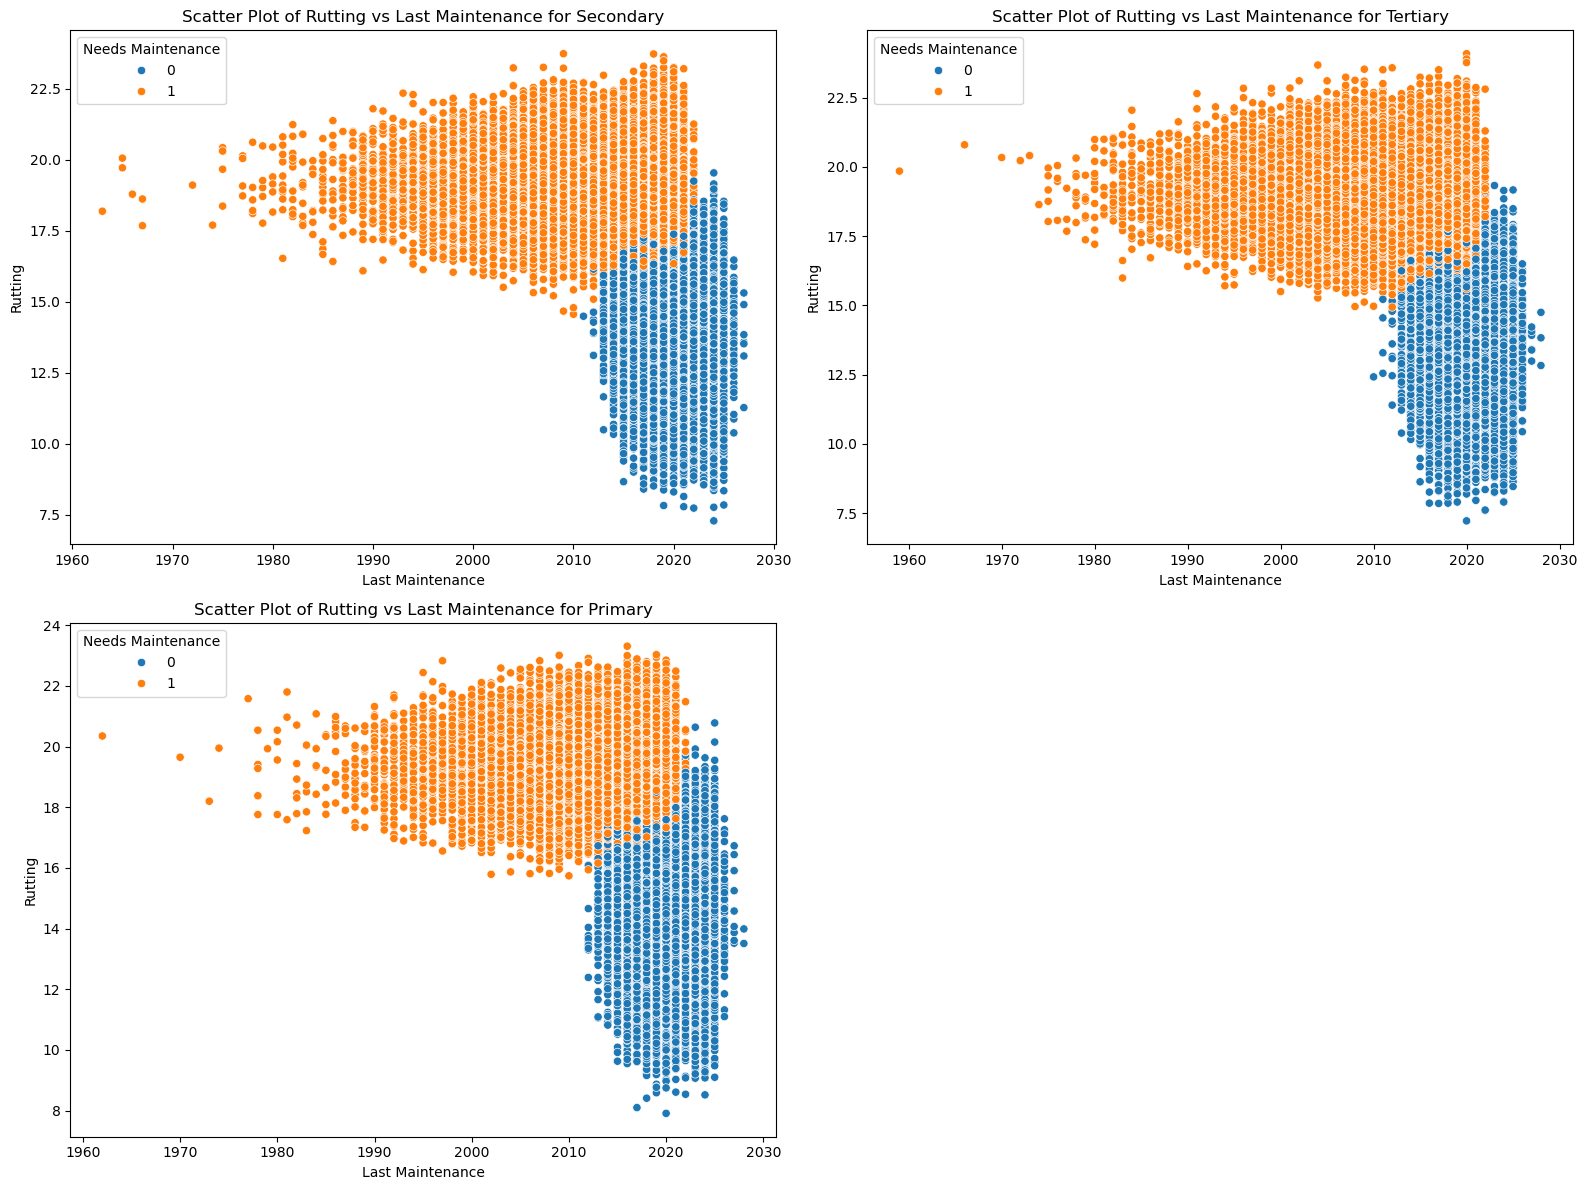

In [26]:
# Example: Scatter plots for each Road Type
road_types = df['Road Type'].unique()
plt.figure(figsize=(16, 12))

for i, road_type in enumerate(road_types, 1):
    plt.subplot(2, 2, i)  # Adjust the grid size if there are more than 4 road types
    sns.scatterplot(data=df[df['Road Type'] == road_type], 
                    y='Rutting', x='Last Maintenance', hue='Needs Maintenance')
    plt.title(f'Scatter Plot of Rutting vs Last Maintenance for {road_type}')
    plt.ylabel('Rutting')
    plt.xlabel('Last Maintenance')
    plt.legend(title='Needs Maintenance')

plt.tight_layout()
plt.show()
